In [48]:
import numpy as np
from numpy import exp, sqrt, abs
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
plt.rcParams['font.size'] = 14

In [55]:
CASE=1
if CASE==0: dname="DATA"
if CASE==1: dname="DATA_b"
#i case==2 dname=data_C.... implement on our own if we want

fname=dname+'/x_RBM_q0.1.dat'
# loading data: each row is a list of visible units
# NOTE: data "x" here is named "v" for "visible"
v = np.loadtxt(fname, delimiter=" ",dtype=int)
# store in v0, because later we will shuffle v
v0 = np.copy(v)
# to start, take a small subsample
# v = v[1:11]
N = len(v)
L = len(v[1])

#SPINS = True
SPINS = False

if SPINS:
    # sigmoid takes into account energy difference =2
    GAP=2
    # convert 0,1 -> -1,1
    v = 2*v - 1
    vmin=-1
else:
    GAP=1
    vmin=0

print(f'each of N={N} data has L={L} digits')

for i in range(min(12,N)):
    if SPINS: print(v0[i],"\n->",v[i])
    else: print(v[i])
print('...')

print(v.shape)

each of N=10000 data has L=20 digits
[0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0]
[0 0 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1]
[0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 1]
[0 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 1 0 0 0]
[0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0]
[0 0 0 1 0 1 0 0 0 0 1 0 1 0 0 0 0 0 1 0]
[0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 1 0 0]
[0 0 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1]
[1 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0]
[0 0 0 1 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0]
[0 0 1 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 1 0]
[0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0]
...
(10000, 20)


## initialize

In [56]:
# RBM, nr of hidden units
if CASE==0: M = 3
if CASE==1: M = 2
# range of each initial weight
sigma = sqrt(4. / float(L + M))
# random seed for reproducibility
np.random.seed(12345)
# initial weights from a Normal distr. (see literature, e.g. page 98 of Mehta's review)
w = sigma * np.random.randn(L,M)
a = sigma * np.random.randn(L)
b = np.zeros(M)
print("w=",w);print("a=",a);print("b=",b)
w0,a0,b0=np.copy(w),np.copy(a),np.copy(b)

w= [[-8.72876393e-02  2.04222126e-01]
 [-2.21489412e-01 -2.36964198e-01]
 [ 8.38211653e-01  5.94150244e-01]
 [ 3.96160518e-02  1.20136963e-01]
 [ 3.27912325e-01  5.31481557e-01]
 [ 4.29466985e-01 -5.52710538e-01]
 [ 1.17256826e-01  9.76087795e-02]
 [ 5.76885677e-01  3.77974741e-01]
 [-8.53501017e-01 -1.58554191e-01]
 [ 7.11674783e-01 -1.87006764e-01]
 [-2.30146526e-01  2.03387092e-01]
 [ 1.38535434e+00 -4.35452880e-01]
 [-2.46070853e-01  5.29254898e-02]
 [ 1.29034856e-01  2.23337160e-01]
 [ 4.00935791e-04  5.73002421e-01]
 [-3.04256178e-01 -3.54405060e-01]
 [-1.01067017e+00 -7.93431066e-01]
 [-3.67028188e-01  2.38846755e-01]
 [-5.39796281e-01  5.10944576e-02]
 [-4.53483232e-01  1.41941667e-01]]
a= [-1.00605956 -0.0850854  -0.6575091  -0.41392318 -0.55731957  0.12209994
  0.16117297 -0.3214583   0.14126068  0.57553201  0.02979552  0.10518219
 -0.0050578   0.4284531   0.56591768 -0.39197445 -0.6605412   0.00945954
  0.32336713 -0.28164852]
b= [0. 0.]


## Plotting

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 1]


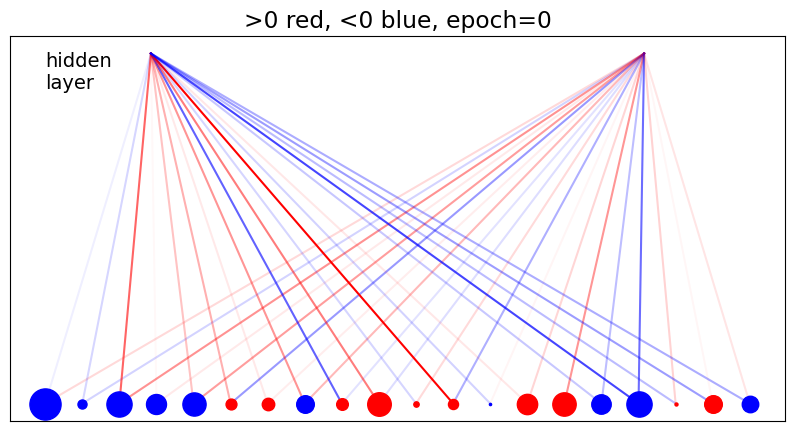

In [57]:
def create_coord(np,x0,f=1.0):
    x=[x0] * np
    print(x)
    y=list(range(np))
    for i in range(np):
        y[i] = f*(y[i]/(np-1.) - 0.5)
    return (x,y)
(x1,y1)=create_coord(L,0)
(x2,y2)=create_coord(M,1,f=0.7)

def mycolor(val):
    if val>0: return 'red'
    elif val<0: return 'blue'
    else: return 'black'

def plotgraph_vert(epoch=0):
    A=2./w.max()
    for i in range(L):
        for j in range(M):
            ex, ey, col = (x1[i],x2[j]),(y1[i],y2[j]),mycolor(w[i][j])
            plt.plot(ex, ey, col, zorder=1, lw=A*abs(w[i][j]))
    # Scatter plot on top of lines
    
    A=300./(a.max()+b.max())
    
    for i in range(L):
        plt.scatter(x1[i], y1[i], s=A*abs(a[i]), zorder=2, c=mycolor(a[i]))

    for j in range(M):
        plt.scatter(x2[j], y2[j], s=A*abs(b[j]), zorder=2, c=mycolor(b[j]), marker="s")
    plt.figaspect(1)
    plt.title(f'>0 red, <0 blue, epoch={epoch}')
    plt.show()
    
def plotgraph(epoch=0):
    fig, ax = plt.subplots(1,1 , figsize=(10, 5))
    ax.tick_params(left=False,bottom=False)
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    
    A=1./max(w.max(),-w.min())
    for i in range(L):
        for j in range(M):
            ex, ey, col = (y1[i],y2[j]),(x1[i],x2[j]),mycolor(w[i][j])
            ax.plot(ex, ey, col, zorder=1, alpha=A*abs(w[i][j]))
    # Scatter plot on top of lines
    #A=300./(a.max()+b.max())
    A=500.
    for i in range(L):
        ax.scatter(y1[i],x1[i], s=A*abs(a[i]), zorder=2, c=mycolor(a[i]))
    for j in range(M):
        ax.scatter(y2[j], x2[j], s=min(300,A*abs(b[j])), zorder=2, c=mycolor(b[j]), marker="s")
    ax.set_title(f'>0 red, <0 blue, epoch={epoch}')
    ax.text(-0.5,0.9,"hidden\nlayer")
    plt.show()
                  
plotgraph()

In [58]:
# eq(213) page 97, activation via sigmoid
# taking into account energy gap DE=2 for "spin" variables (-1,1)
def activate(v_in,wei,bias,DE,info=False):
    act = np.dot(v_in, wei) + bias
    n = np.shape(act)
    prob = 1. / (1. + exp(-DE*act))
    v_out = np.full(n, vmin, dtype=int) # a list on -1's or 0's
    v_out[np.random.random_sample(n) < prob] = 1 # activate the 1's with probability prob
    if info:
        print('input=', v_in)
        print('act=',act)
        print('prob=',prob)
        print('output=',v_out)
    return v_out

k = 9
activate(v[k],w,b,GAP,info=True)

input= [0 0 0 1 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0]
act= [-0.27337957  1.12943723]
prob= [0.4320776  0.75573503]
output= [0 0]


array([0, 0])

## Point 4:

If we simply use the activate function for the backward step of the contrastive divergence, we would generate vectors with 0s and 1s (activating a 1 for each component of the new vector, if a random generated number is under the probability calculated above). If we do so, however, for each 4 blocks of the vector there are $2^4$ possible states, while fot the way in which our data is structured (one-hot encoding) the ''real'' possible states are only 4: 0001,0010,0100,1000.    

Here is what I did:
- I defined a vector that contains all possible states, $s$
- for each entry of our data (a row with 20 elements) I divide it in blocks of 4;
- I compared each block of 4 with each state of s, to recognize to which state it corresponds;
- I compute the energy of the state as  $$E_{state}= \sum_{k \in block}[a_{k}+ \sum_{\nu}W_{k \nu}h_{\nu}]v_{k}$$
  where $v_{k}$ is (each time) the sub-vector of our real vector v constituded by 4 elements;

- I computed the Boltzmann's weights for each of the 4 states as $exp^{-E_{state}}$
- I calculated the normalized probability $p$.

Then, in order to have 4 intervals between 0 and 1, I calculated the cumulative probability for each state: $${C_{prob}}_i=\sum_{j\leq i}p_j$$.    
    
At this point, I have 4 levels that divide the gap 0-1 into 4 intervals. I generate a random number between 0 and 1 and, depending on which interval it belongs, I then generate the corresponding state of s.    
In this way, I generate 4 blocks at a time of the new "fantasy" vector (so I do it $5$ times), preserving the one-hot encoding structure.

In [59]:
s = np.array([[0,0,0,1],[0,0,1,0],[0,1,0,0],[1,0,0,0]])
vtest = np.array([0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0])
print(vtest)
htest = np.array([0, 1])  


def activate_back(v,h,w,a,k,steps):
    
    e = np.zeros(4)
    
    for i in range(0,20,4):
        for j in range(len(s)):
            if np.array_equiv(v[i:i+4],s[j])==True:
                local_f = a[i:i+4]+np.dot(h,w[:,i:i+4])
                e[j]+= np.dot(local_f,v[i:i+4])
    b = exp(e)
    p = b/b.sum()
    #print(p)
    cprob = np.zeros(4)
    cprob[0] = p[0]
    for i in range(1,4):
        cprob[i]+=cprob[i-1]+p[i]
        
    vf = np.zeros(20)
    for i in range(0,20,4):
        x = np.random.random()
        if x<=cprob[0]:
            vf[i:i+4]=s[0]
        if cprob[0]<x<=cprob[1]:
            vf[i:i+4]=s[1]
        if cprob[1]<x<=cprob[2]:
            vf[i:i+4]=s[2]
        if cprob[2]<x<=cprob[3]:
            vf[i:i+4]=s[3]
            
    for i in range(0,2):
        if k == 500*i and steps==1:
            print('----initiating backward CD: k = ',k,'----')
            print('WEIGHTS[0] : ', w.T[0])
            print('EVALUATED ENERGIES = ',e, '\n') 
            print('PROBABILITY : ', p, '\n')                       #it starts to behave strangely after 4,5 epochs
            print('CUMULATIVE PROBABILITY : ', cprob, '\n\n')
            
    return(vf,cprob)

vf, cprob = activate_back(vtest,htest,w.T,a,1,1)
print(vf)
print(cprob)

[0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0]
[1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0.]
[0.17803597 0.48485895 0.82650521 1.        ]


# Training with ADAM and more steps of CD

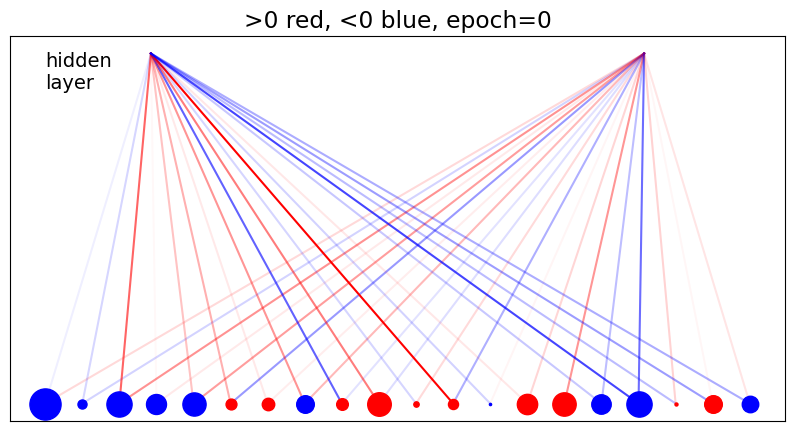

----initiating backward CD: k =  0 ----
WEIGHTS[0] :  [-0.08728764  0.20422213]
EVALUATED ENERGIES =  [ 0.         -0.2360776   0.55748796 -0.22940725] 

PROBABILITY :  [0.23089333 0.18234094 0.40320446 0.18356128] 

CUMULATIVE PROBABILITY :  [0.23089333 0.41323426 0.81643872 1.        ] 


----initiating backward CD: k =  500 ----
WEIGHTS[0] :  [-0.08728764  0.20422213]
EVALUATED ENERGIES =  [-0.37430713 -0.41678015  0.         -0.4805359 ] 

PROBABILITY :  [0.23193145 0.22228688 0.33722453 0.20855714] 

CUMULATIVE PROBABILITY :  [0.23193145 0.45421833 0.79144286 1.        ] 




KeyboardInterrupt: 

In [54]:
# random seed for reproducibility
np.random.seed(12345)

plotgraph(0)

# learning rate
l_rate = 1.0

# initialize Adam 
beta1=0.9
beta2=0.999
epsilon=1e-8
m_dw, v_dw = 0, 0
m_db, v_db = 0, 0
m_da, v_da = 0, 0
t=1

# minibatch
mini, m = 500, 0
steps=3
# train model
print('===================================================')
for epoch in range(100):
    # aggregate normalization of batch statistics and learning rate
    l_rate_m = l_rate / mini
    for k in range(N):
        if m==0:
            # initialize averages in miniblock
            v_data, v_model = np.zeros(L),np.zeros(L)
            h_data, h_model = np.zeros(M),np.zeros(M)
            vh_data,vh_model= np.zeros((L,M)),np.zeros((L,M))

        # positive CD phase: generating h 
        h = activate(v[k],w,b,GAP)
        hf = h
        for i in range(steps):
            vf,_ = activate_back(v[k],hf,w.T,a,k,i)
            # one more positive CD phase: generating fantasy h from fantasy vf 
            hf = activate(vf,w,b,GAP)
        v_data  += v[k]
        v_model += vf
        h_data  += h
        h_model += hf
        vh_data += np.outer(v[k].T,h)
        vh_model+= np.outer(vf.T,hf)
    
        m += 1
        # minibatch
        if m==mini:
            # gradient of the likelihood: follow it along its positive direction
            # with a Adam optimizer
            dw = l_rate_m*(vh_data - vh_model)
            da = l_rate_m*(v_data - v_model)       #removed l_rate_m (has to be used after)
            db = l_rate_m*(h_data - h_model)
            
            ##********update***********##
            m_dw = beta1*m_dw + (1-beta1)*(vh_data - vh_model)
            m_db = beta1*m_db + (1-beta1)*(h_data - h_model)
            m_da = beta1*m_da + (1-beta1)*(v_data - v_model)

            ## rms beta 2
            v_dw = beta2*v_dw + (1-beta2)*((vh_data - vh_model)**2)
            v_db = beta2*v_db + (1-beta2)*((h_data - h_model)**2)
            v_da = beta2*v_da + (1-beta2)*((v_data - v_model)**2)

            ## bias correction
            m_dw_corr = m_dw/(1-beta1**t)
            m_db_corr = m_db/(1-beta1**t)
            m_da_corr = m_da/(1-beta1**t)

            v_dw_corr = v_dw/(1-beta2**t)
            v_db_corr = v_db/(1-beta2**t)
            v_da_corr = v_da/(1-beta2**t)
            
            
            if epoch%10==9 and k<=mini:
                print('----------- epoch =',epoch,'  k=',k,'  m=',m)
                print('dw =',dw)
                print('da =',da)
                print('db =',db)
                print('vh_data \n', vh_data, '\n')
                print('vh_model \n',vh_model)
                
            ## update weights and biases
            w = w - l_rate_m*(m_dw_corr/(np.sqrt(v_dw_corr)+epsilon))
            b = b - l_rate_m*(m_db_corr/(np.sqrt(v_db_corr)+epsilon))
            a = a - l_rate_m*(m_da_corr/(np.sqrt(v_da_corr)+epsilon))
            m=0
            t=t+1 #update the time
    
    # randomize the order of input data
    np.random.shuffle(v)
    # decrease the learning rate (here as a power law)
    l_rate = l_rate / (0.01 * l_rate + 1)
    if epoch%10==9:
        plotgraph(epoch+1)
        print('l_rate = ',l_rate)


# Training with RMSprop

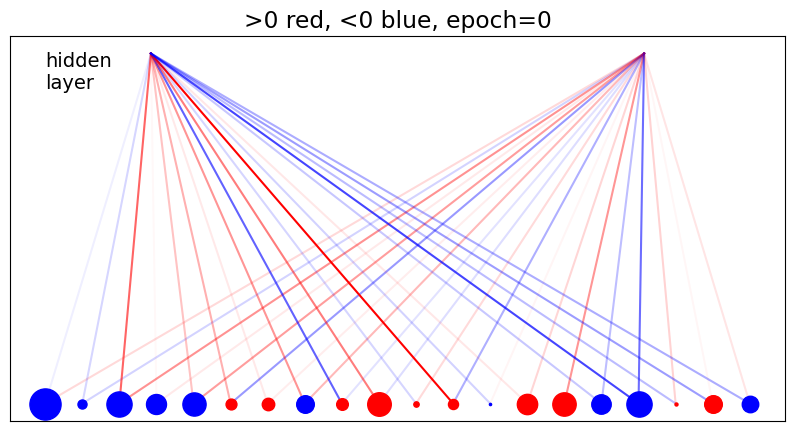

----initiating backward CD: k =  0 ----
WEIGHTS[0] :  [-0.08728764  0.20422213]
EVALUATED ENERGIES =  [ 0.         -0.2360776   0.55748796 -0.22940725] 

PROBABILITY :  [0.23089333 0.18234094 0.40320446 0.18356128] 

CUMULATIVE PROBABILITY :  [0.23089333 0.41323426 0.81643872 1.        ] 


----initiating backward CD: k =  500 ----
WEIGHTS[0] :  [-0.08728764  0.20422213]
EVALUATED ENERGIES =  [-0.37430713 -0.41678015  0.         -0.4805359 ] 

PROBABILITY :  [0.23193145 0.22228688 0.33722453 0.20855714] 

CUMULATIVE PROBABILITY :  [0.23193145 0.45421833 0.79144286 1.        ] 


----initiating backward CD: k =  0 ----
WEIGHTS[0] :  [-0.09235064  0.19878674]
EVALUATED ENERGIES =  [ 0.09921399 -0.32330796  0.12766458 -0.0106642 ] 

PROBABILITY :  [0.27931445 0.18306042 0.28737523 0.2502499 ] 

CUMULATIVE PROBABILITY :  [0.27931445 0.46237487 0.7497501  1.        ] 


----initiating backward CD: k =  500 ----
WEIGHTS[0] :  [-0.09235064  0.19878674]
EVALUATED ENERGIES =  [-1.05785439  0.  

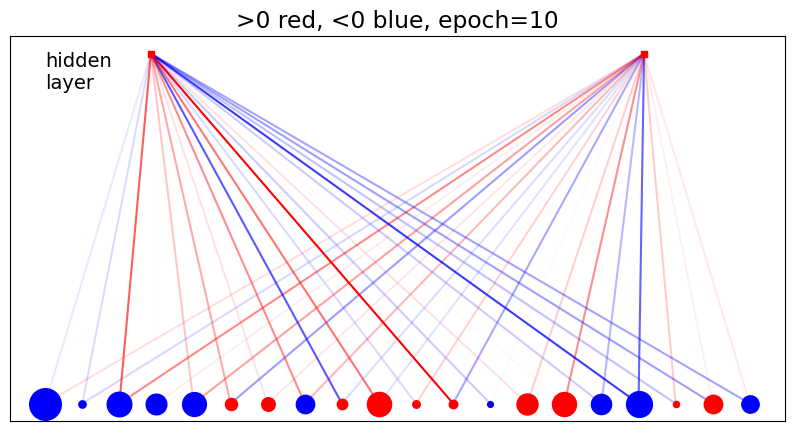

l_rate =  0.001
----initiating backward CD: k =  0 ----
WEIGHTS[0] :  [-0.1157762   0.17595846]
EVALUATED ENERGIES =  [ 0.63691719  0.23950367  0.         -0.59707274] 

PROBABILITY :  [0.40126717 0.26967403 0.21223842 0.11682038] 

CUMULATIVE PROBABILITY :  [0.40126717 0.6709412  0.88317962 1.        ] 


----initiating backward CD: k =  500 ----
WEIGHTS[0] :  [-0.1157762   0.17595846]
EVALUATED ENERGIES =  [ 0.          0.59532211  0.79574901 -1.03496265] 

PROBABILITY :  [0.18570258 0.33679298 0.41153553 0.06596892] 

CUMULATIVE PROBABILITY :  [0.18570258 0.52249556 0.93403108 1.        ] 


----initiating backward CD: k =  0 ----
WEIGHTS[0] :  [-0.11793753  0.17381233]
EVALUATED ENERGIES =  [-1.03486608  0.09781818  0.         -0.08372185] 

PROBABILITY :  [0.10518149 0.32648094 0.29605741 0.27228016] 

CUMULATIVE PROBABILITY :  [0.10518149 0.43166243 0.72771984 1.        ] 


----initiating backward CD: k =  500 ----
WEIGHTS[0] :  [-0.11793753  0.17381233]
EVALUATED ENERGIES =  [0

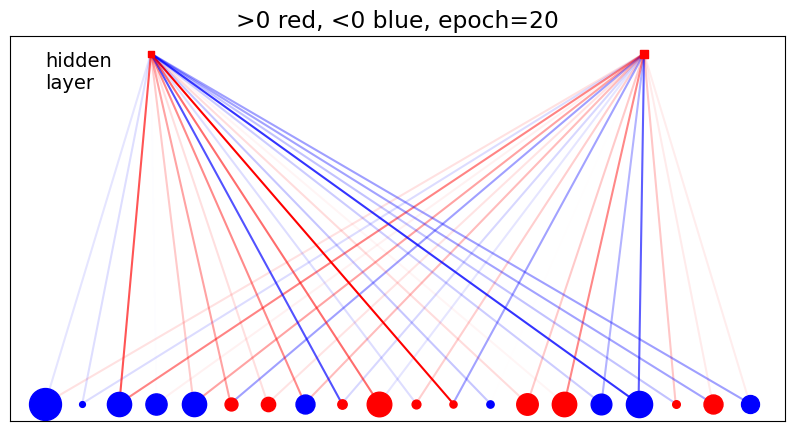

l_rate =  0.001
----initiating backward CD: k =  0 ----
WEIGHTS[0] :  [-0.1367252   0.15507289]
EVALUATED ENERGIES =  [0.24087301 0.66788274 0.92672928 0.        ] 

PROBABILITY :  [0.1885341  0.2889601  0.37432903 0.14817676] 

CUMULATIVE PROBABILITY :  [0.1885341  0.47749421 0.85182324 1.        ] 


----initiating backward CD: k =  500 ----
WEIGHTS[0] :  [-0.1367252   0.15507289]
EVALUATED ENERGIES =  [-0.24903206  0.          0.93571774  0.15181608] 

PROBABILITY :  [0.14192969 0.18206501 0.46409143 0.21191387] 

CUMULATIVE PROBABILITY :  [0.14192969 0.3239947  0.78808613 1.        ] 


----initiating backward CD: k =  0 ----
WEIGHTS[0] :  [-0.13901196  0.15310979]
EVALUATED ENERGIES =  [ 0.58891406  1.29882473  0.87607225 -2.62098787] 

PROBABILITY :  [0.22692176 0.46151566 0.30240389 0.00915869] 

CUMULATIVE PROBABILITY :  [0.22692176 0.68843742 0.99084131 1.        ] 


----initiating backward CD: k =  500 ----
WEIGHTS[0] :  [-0.13901196  0.15310979]
EVALUATED ENERGIES =  [-1.08

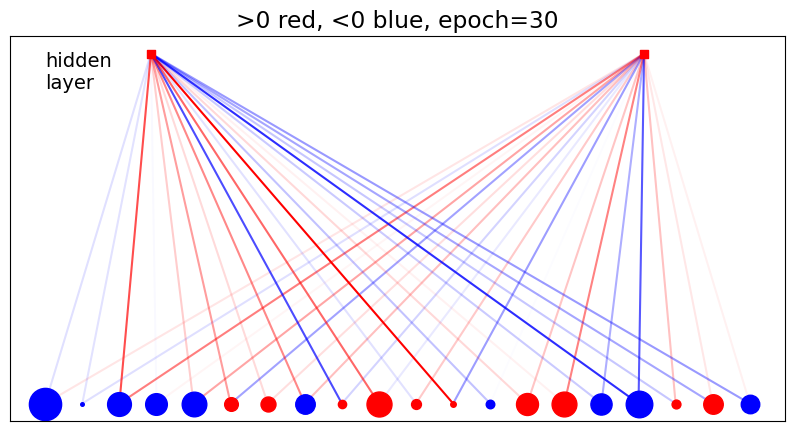

l_rate =  0.001
----initiating backward CD: k =  0 ----
WEIGHTS[0] :  [-0.15791653  0.13440634]
EVALUATED ENERGIES =  [ 0.         -0.09062757  0.50007773 -0.6281972 ] 

PROBABILITY :  [0.24415493 0.22300081 0.40257471 0.13026955] 

CUMULATIVE PROBABILITY :  [0.24415493 0.46715574 0.86973045 1.        ] 


----initiating backward CD: k =  500 ----
WEIGHTS[0] :  [-0.15791653  0.13440634]
EVALUATED ENERGIES =  [ 0.          0.87011852  0.72843188 -1.07665741] 

PROBABILITY :  [0.17242106 0.41160248 0.35722699 0.05874947] 

CUMULATIVE PROBABILITY :  [0.17242106 0.58402355 0.94125053 1.        ] 


----initiating backward CD: k =  0 ----
WEIGHTS[0] :  [-0.15976488  0.13234874]
EVALUATED ENERGIES =  [ 0.          1.69340178 -0.17242873 -1.75940491] 

PROBABILITY :  [0.13419732 0.72975806 0.11294292 0.0231017 ] 

CUMULATIVE PROBABILITY :  [0.13419732 0.86395538 0.9768983  1.        ] 


----initiating backward CD: k =  500 ----
WEIGHTS[0] :  [-0.15976488  0.13234874]
EVALUATED ENERGIES =  [ 

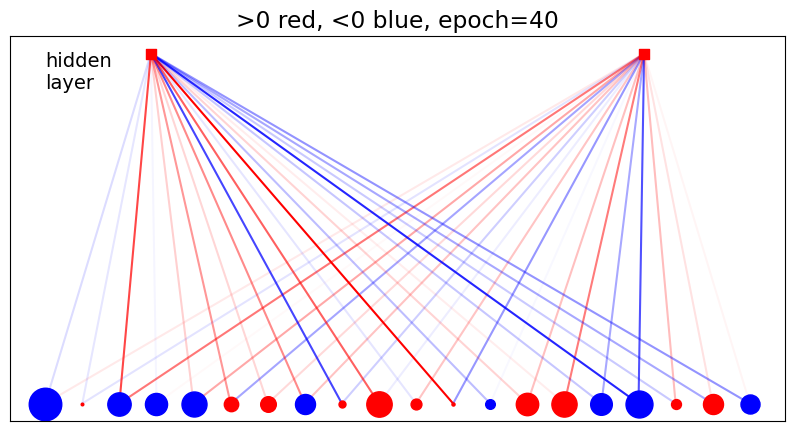

l_rate =  0.001
----initiating backward CD: k =  0 ----
WEIGHTS[0] :  [-0.17831202  0.11372352]
EVALUATED ENERGIES =  [ 0.          2.07190218 -0.10320103 -1.14115537] 

PROBABILITY :  [0.09841253 0.78138685 0.08876276 0.03143786] 

CUMULATIVE PROBABILITY :  [0.09841253 0.87979939 0.96856214 1.        ] 


----initiating backward CD: k =  500 ----
WEIGHTS[0] :  [-0.17831202  0.11372352]
EVALUATED ENERGIES =  [ 0.74149772  0.46327046  0.74500102 -1.85542307] 

PROBABILITY :  [0.35271666 0.26705051 0.3539545  0.02627832] 

CUMULATIVE PROBABILITY :  [0.35271666 0.61976718 0.97372168 1.        ] 


----initiating backward CD: k =  0 ----
WEIGHTS[0] :  [-0.18031664  0.111823  ]
EVALUATED ENERGIES =  [-1.70577923  0.46756606 -0.11768918 -0.89735001] 

PROBABILITY :  [0.05907929 0.5191671  0.28915723 0.13259637] 

CUMULATIVE PROBABILITY :  [0.05907929 0.5782464  0.86740363 1.        ] 


----initiating backward CD: k =  500 ----
WEIGHTS[0] :  [-0.18031664  0.111823  ]
EVALUATED ENERGIES =  [-

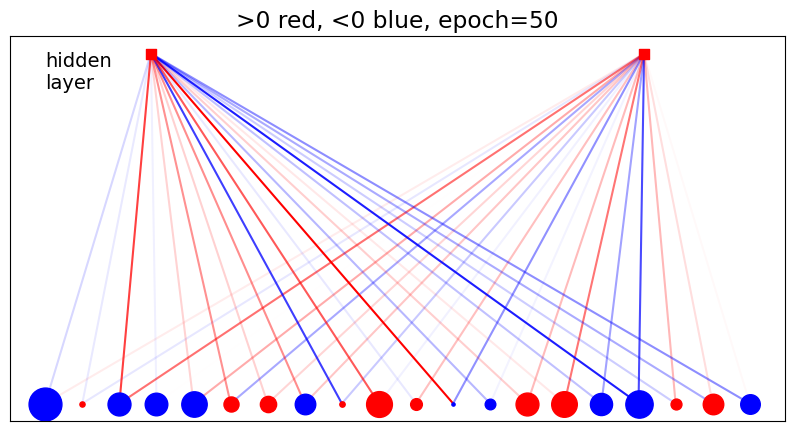

l_rate =  0.001
----initiating backward CD: k =  0 ----
WEIGHTS[0] :  [-0.19922627  0.09331965]
EVALUATED ENERGIES =  [ 0.          1.64564973  0.         -0.56409536] 

PROBABILITY :  [0.12897814 0.66867134 0.12897814 0.07337238] 

CUMULATIVE PROBABILITY :  [0.12897814 0.79764948 0.92662762 1.        ] 


----initiating backward CD: k =  500 ----
WEIGHTS[0] :  [-0.19922627  0.09331965]
EVALUATED ENERGIES =  [ 0.71149275  0.          0.14731876 -3.33290664] 

PROBABILITY :  [0.48140318 0.23632604 0.27383648 0.00843429] 

CUMULATIVE PROBABILITY :  [0.48140318 0.71772922 0.99156571 1.        ] 


----initiating backward CD: k =  0 ----
WEIGHTS[0] :  [-0.20113067  0.09140463]
EVALUATED ENERGIES =  [-0.69648325  0.          1.44241536 -1.90090445] 

PROBABILITY :  [0.08476997 0.17010648 0.71970396 0.02541959] 

CUMULATIVE PROBABILITY :  [0.08476997 0.25487645 0.97458041 1.        ] 


----initiating backward CD: k =  500 ----
WEIGHTS[0] :  [-0.20113067  0.09140463]
EVALUATED ENERGIES =  [ 

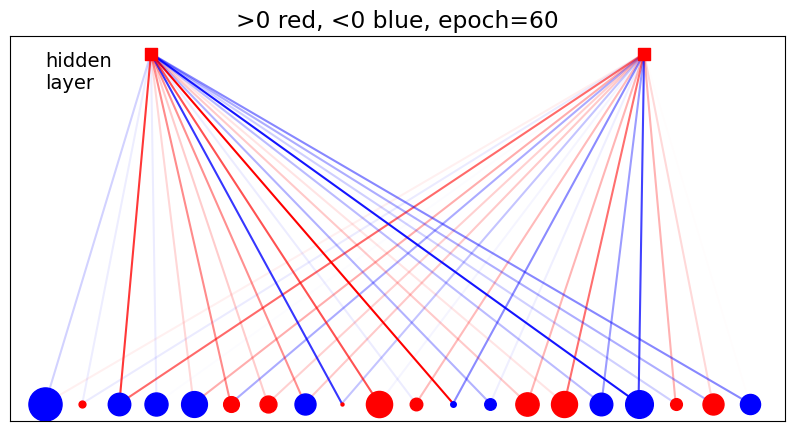

l_rate =  0.001
----initiating backward CD: k =  0 ----
WEIGHTS[0] :  [-0.2192616   0.07292775]
EVALUATED ENERGIES =  [1.00190148 2.72226532 0.28523279 0.        ] 

PROBABILITY :  [0.13437035 0.75066814 0.06562332 0.04933819] 

CUMULATIVE PROBABILITY :  [0.13437035 0.88503849 0.95066181 1.        ] 


----initiating backward CD: k =  500 ----
WEIGHTS[0] :  [-0.2192616   0.07292775]
EVALUATED ENERGIES =  [-0.19358908  1.40811464  0.51847627 -1.34523128] 

PROBABILITY :  [0.12025313 0.59663328 0.24509951 0.03801408] 

CUMULATIVE PROBABILITY :  [0.12025313 0.71688641 0.96198592 1.        ] 


----initiating backward CD: k =  0 ----
WEIGHTS[0] :  [-0.22135026  0.0708666 ]
EVALUATED ENERGIES =  [-1.66761191  0.41792579  0.         -0.69802515] 

PROBABILITY :  [0.05887454 0.47387638 0.31200546 0.15524361] 

CUMULATIVE PROBABILITY :  [0.05887454 0.53275093 0.84475639 1.        ] 


----initiating backward CD: k =  500 ----
WEIGHTS[0] :  [-0.22135026  0.0708666 ]
EVALUATED ENERGIES =  [-0.42

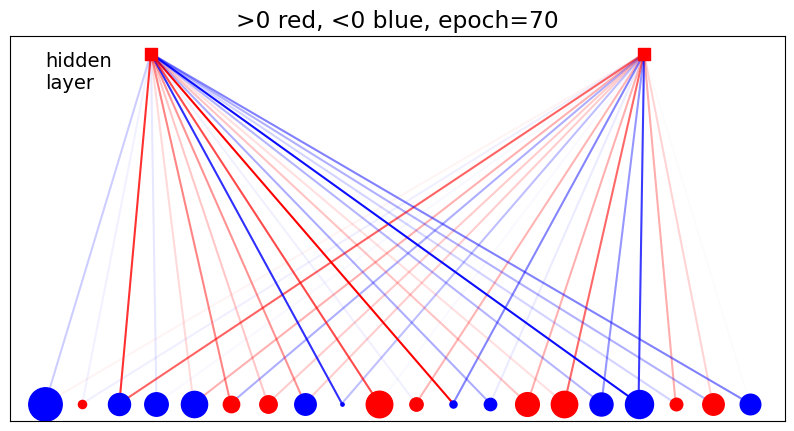

l_rate =  0.001
----initiating backward CD: k =  0 ----
WEIGHTS[0] :  [-0.24020246  0.05240727]
EVALUATED ENERGIES =  [ 0.28882707  1.6050747   0.         -5.59561612] 

PROBABILITY :  [1.82437636e-01 6.80383102e-01 1.36671649e-01 5.07613576e-04] 

CUMULATIVE PROBABILITY :  [0.18243764 0.86282074 0.99949239 1.        ] 


----initiating backward CD: k =  500 ----
WEIGHTS[0] :  [-0.24020246  0.05240727]
EVALUATED ENERGIES =  [-0.13372707  0.30580342  0.         -0.80794496] 

PROBABILITY :  [0.23783396 0.36911317 0.27186343 0.12118944] 

CUMULATIVE PROBABILITY :  [0.23783396 0.60694713 0.87881056 1.        ] 


----initiating backward CD: k =  0 ----
WEIGHTS[0] :  [-0.24207937  0.05037684]
EVALUATED ENERGIES =  [ 0.58050207  1.5610021   0.48158284 -0.65998345] 

PROBABILITY :  [0.2057254  0.54842048 0.18634933 0.05950479] 

CUMULATIVE PROBABILITY :  [0.2057254  0.75414588 0.94049521 1.        ] 


----initiating backward CD: k =  500 ----
WEIGHTS[0] :  [-0.24207937  0.05037684]
EVALUATE

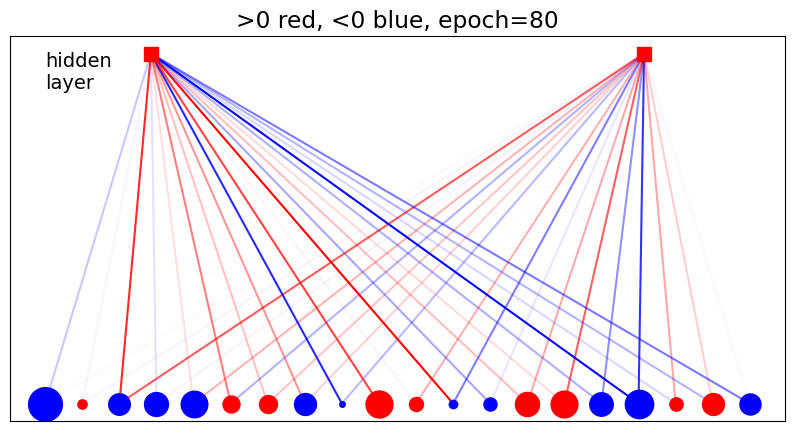

l_rate =  0.001
----initiating backward CD: k =  0 ----
WEIGHTS[0] :  [-0.26050308  0.03180764]
EVALUATED ENERGIES =  [-1.4728839   0.9028815   0.40912857 -2.79478988] 

PROBABILITY :  [0.0537849  0.57868493 0.35318968 0.01434049] 

CUMULATIVE PROBABILITY :  [0.0537849  0.63246983 0.98565951 1.        ] 


----initiating backward CD: k =  500 ----
WEIGHTS[0] :  [-0.26050308  0.03180764]
EVALUATED ENERGIES =  [-1.37928496  0.          1.85343992  0.        ] 

PROBABILITY :  [0.02916068 0.11582797 0.73918337 0.11582797] 

CUMULATIVE PROBABILITY :  [0.02916068 0.14498865 0.88417203 1.        ] 


----initiating backward CD: k =  0 ----
WEIGHTS[0] :  [-0.26255598  0.02982785]
EVALUATED ENERGIES =  [-0.78843948  0.54234512  2.28164244  0.        ] 

PROBABILITY :  [0.03505372 0.13264368 0.75518578 0.07711681] 

CUMULATIVE PROBABILITY :  [0.03505372 0.16769741 0.92288319 1.        ] 


----initiating backward CD: k =  500 ----
WEIGHTS[0] :  [-0.26255598  0.02982785]
EVALUATED ENERGIES =  [-

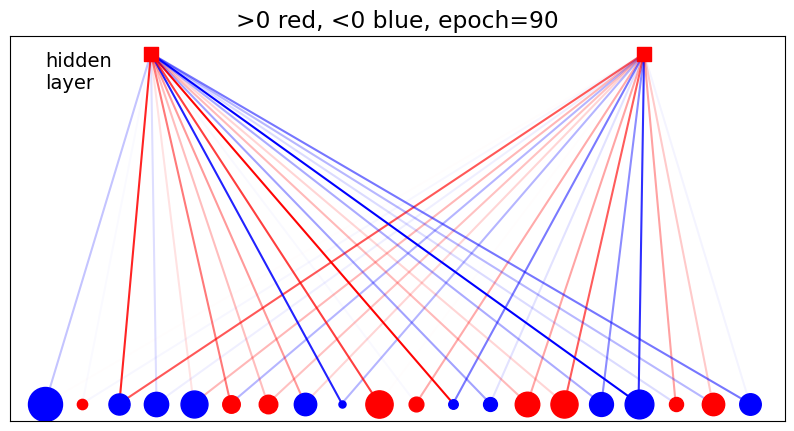

l_rate =  0.001
----initiating backward CD: k =  0 ----
WEIGHTS[0] :  [-0.28094511  0.01158755]
EVALUATED ENERGIES =  [ 0.16283539  1.7286874   1.69020679 -4.51445095] 

PROBABILITY :  [0.09613435 0.46017125 0.44279995 0.00089446] 

CUMULATIVE PROBABILITY :  [0.09613435 0.55630559 0.99910554 1.        ] 


----initiating backward CD: k =  500 ----
WEIGHTS[0] :  [-0.28094511  0.01158755]
EVALUATED ENERGIES =  [ 0.          0.96437931  1.89614954 -1.44888771] 

PROBABILITY :  [0.09507339 0.24939261 0.63320779 0.02232621] 

CUMULATIVE PROBABILITY :  [0.09507339 0.344466   0.97767379 1.        ] 


----initiating backward CD: k =  0 ----
WEIGHTS[0] :  [-0.28279599  0.00963112]
EVALUATED ENERGIES =  [-2.03890497  0.60548375  0.6069225  -0.78158579] 

PROBABILITY :  [0.03059421 0.43060854 0.43122853 0.10756872] 

CUMULATIVE PROBABILITY :  [0.03059421 0.46120275 0.89243128 1.        ] 


----initiating backward CD: k =  500 ----
WEIGHTS[0] :  [-0.28279599  0.00963112]
EVALUATED ENERGIES =  [-

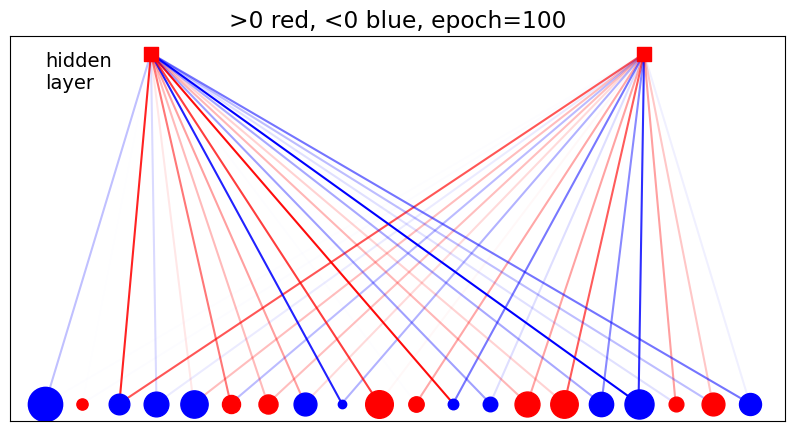

l_rate =  0.001


In [60]:
# random seed for reproducibility
np.random.seed(12345)

plotgraph(0)

# learning rate
l_rate = 1e-3

# initialize RMSprop 
beta=0.9
epsilon=1e-8
v_dw, v_db, v_da = 0, 0, 0

# minibatch
mini, m = 5000, 0
steps=3
# train model
print('===================================================')
for epoch in range(100):
    # aggregate normalization of batch statistics and learning rate
    l_rate_m = l_rate / mini
    for k in range(N):
        if m==0:
            # initialize averages in miniblock
            v_data, v_model = np.zeros(L),np.zeros(L)
            h_data, h_model = np.zeros(M),np.zeros(M)
            vh_data,vh_model= np.zeros((L,M)),np.zeros((L,M))

        # positive CD phase: generating h 
        h = activate(v[k],w,b,GAP)
        hf = h
        for i in range(steps):
            vf,_ = activate_back(v[k],hf,w.T,a,k,i)
            # one more positive CD phase: generating fantasy h from fantasy vf 
            hf = activate(vf,w,b,GAP)
        v_data  += v[k]
        v_model += vf
        h_data  += h
        h_model += hf
        vh_data += np.outer(v[k].T,h)
        vh_model+= np.outer(vf.T,hf)
    
        m += 1
        # minibatch
        if m==mini:
            # gradient of the likelihood: follow it along its positive direction
            # with a Adam optimizer
            dw = l_rate_m*(vh_data - vh_model)
            da = l_rate_m*(v_data - v_model)       #removed l_rate_m (has to be used after)
            db = l_rate_m*(h_data - h_model)

            ## rms prop
            v_dw = beta*v_dw + (1-beta)*((vh_data - vh_model)**2)
            v_db = beta*v_db + (1-beta)*((h_data - h_model)**2)
            v_da = beta*v_da + (1-beta)*((v_data - v_model)**2)

            if epoch%10==9 and k<=mini:
                print('----------- epoch =',epoch,'  k=',k,'  m=',m)
                print('dw =',dw)
                print('da =',da)
                print('db =',db)
                print('vh_data \n', vh_data, '\n')
                print('vh_model \n',vh_model)
                
            ## update weights and biases
            w = w - l_rate*((vh_data - vh_model)/(np.sqrt(v_dw+epsilon)))
            b = b - l_rate*((h_data - h_model)/(np.sqrt(v_db+epsilon)))
            a = a - l_rate*((v_data - v_model)/(np.sqrt(v_da+epsilon)))
            m=0
    
    # randomize the order of input data
    np.random.shuffle(v)
    # decrease the learning rate (here as a power law)
    #l_rate = l_rate / (0.01 * l_rate + 1)
    if epoch%10==9:
        plotgraph(epoch+1)
        print('l_rate = ',l_rate)


# Optional 5. plot the weights 


Plot the weights wiμ of each hidden unit μ
in an A×G table, with a color map preserving the
rule that red means positive and blue
means negative weight

In [44]:
print('w0=',w0);print('a0=',a0);print('b0=',b0)
print('w=',w);print('a=',a);print('b=',b)


w0= [[-8.72876393e-02  2.04222126e-01]
 [-2.21489412e-01 -2.36964198e-01]
 [ 8.38211653e-01  5.94150244e-01]
 [ 3.96160518e-02  1.20136963e-01]
 [ 3.27912325e-01  5.31481557e-01]
 [ 4.29466985e-01 -5.52710538e-01]
 [ 1.17256826e-01  9.76087795e-02]
 [ 5.76885677e-01  3.77974741e-01]
 [-8.53501017e-01 -1.58554191e-01]
 [ 7.11674783e-01 -1.87006764e-01]
 [-2.30146526e-01  2.03387092e-01]
 [ 1.38535434e+00 -4.35452880e-01]
 [-2.46070853e-01  5.29254898e-02]
 [ 1.29034856e-01  2.23337160e-01]
 [ 4.00935791e-04  5.73002421e-01]
 [-3.04256178e-01 -3.54405060e-01]
 [-1.01067017e+00 -7.93431066e-01]
 [-3.67028188e-01  2.38846755e-01]
 [-5.39796281e-01  5.10944576e-02]
 [-4.53483232e-01  1.41941667e-01]]
a0= [-1.00605956 -0.0850854  -0.6575091  -0.41392318 -0.55731957  0.12209994
  0.16117297 -0.3214583   0.14126068  0.57553201  0.02979552  0.10518219
 -0.0050578   0.4284531   0.56591768 -0.39197445 -0.6605412   0.00945954
  0.32336713 -0.28164852]
b0= [0. 0.]
w= [[-0.92769247 -0.60742627]
 [ 0

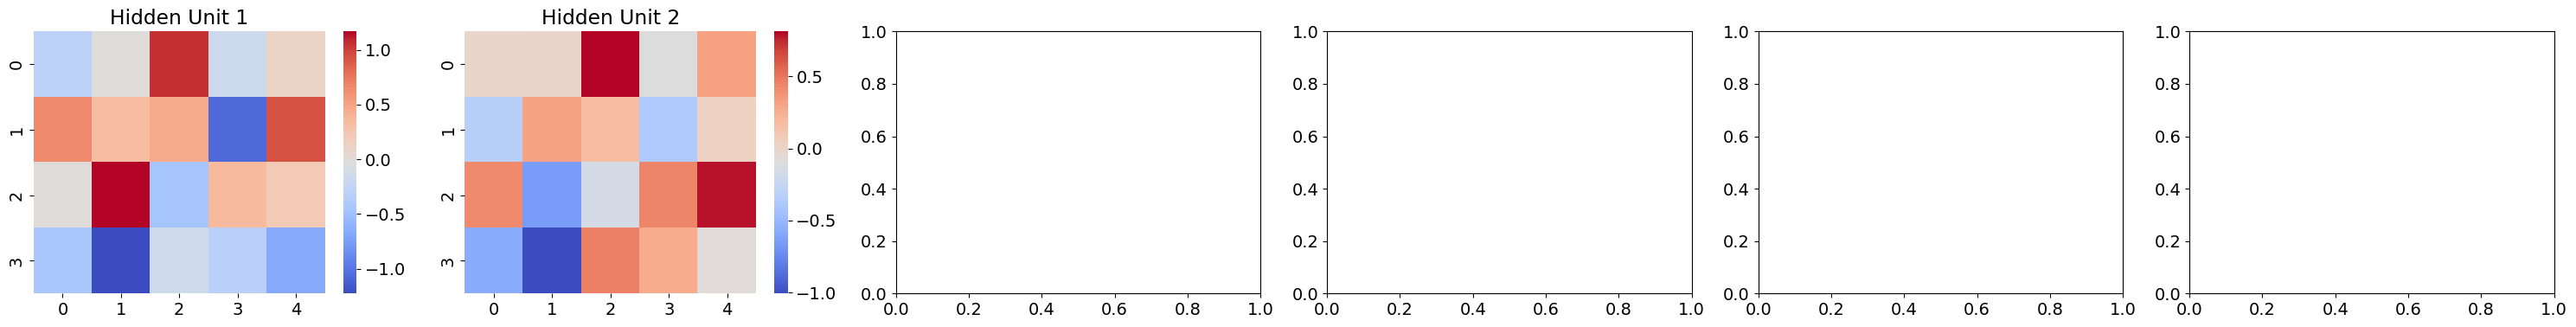

In [62]:
w1=[w[:,i].reshape(4,5) for i in range(M)]
import seaborn as sns

fig, axs = plt.subplots(ncols=6, figsize=(5*6,4))
for i in range(M):
    sns.heatmap(w1[i], cmap='coolwarm', annot=False, ax=axs[i])
    axs[i].set_title(f'Hidden Unit {i+1}')
    plt.tight_layout()
plt.show()

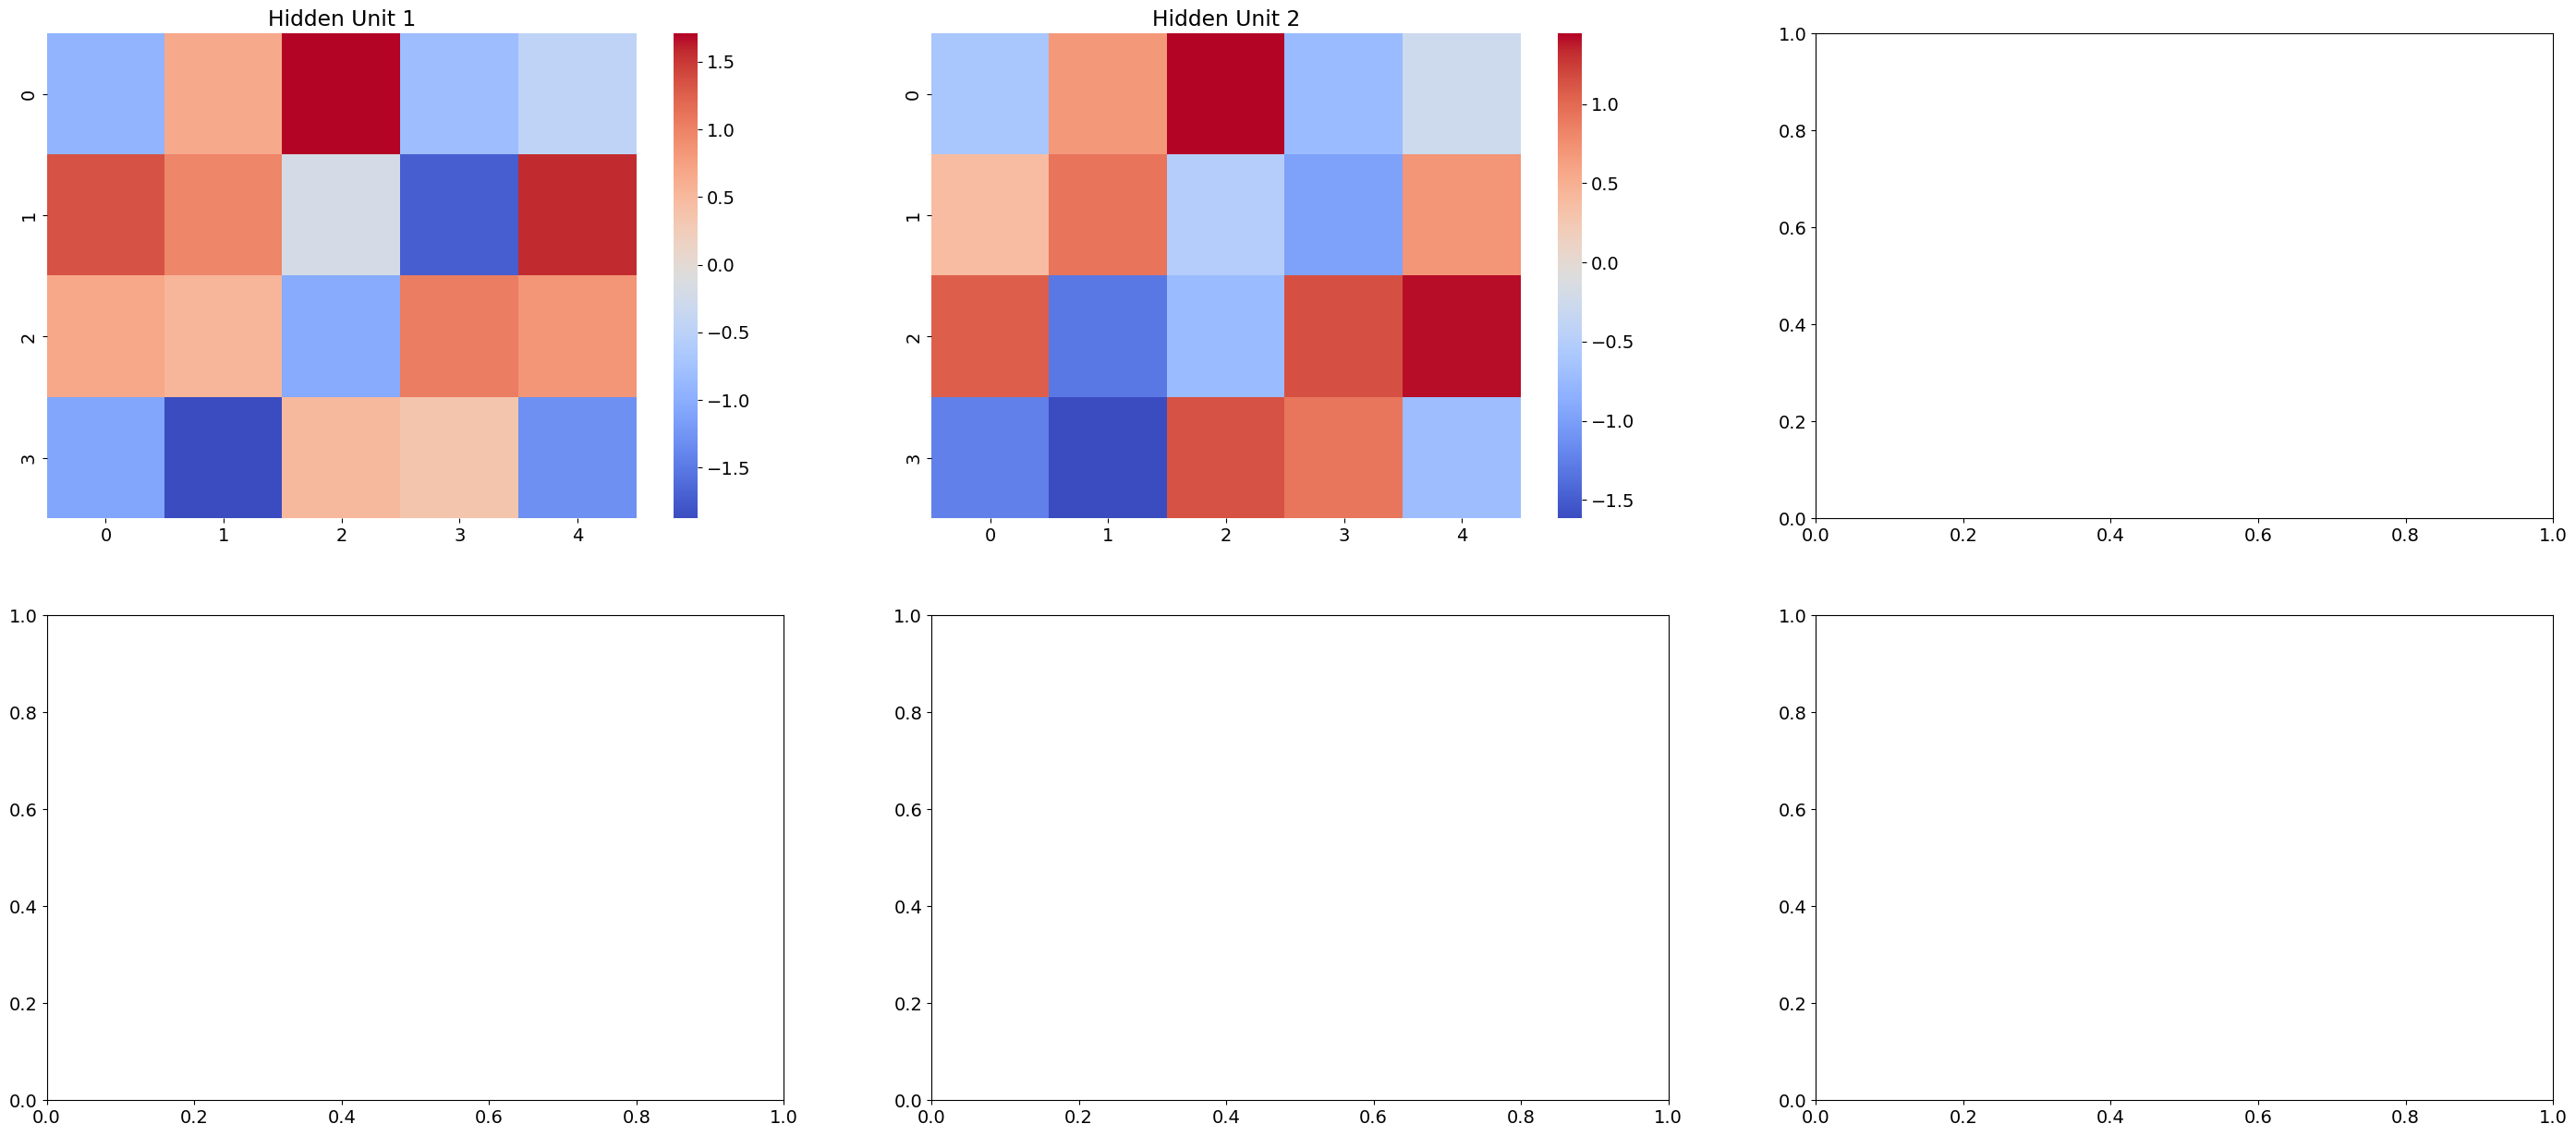

In [61]:
fig, axs = plt.subplots(nrows=2,ncols=3,figsize=(35,15))
for i in range(M):
    sns.heatmap(w1[i], cmap='coolwarm', annot=False, ax=axs.flat[i])
    axs.flat[i].set_title(f'Hidden Unit {i+1}')
plt.show()

